# 乳腺癌合并其他癌症的数据挖掘

## 1. 读取数据

In [2]:
# 读取单发乳腺癌数据

import pandas as pd

data = pd.read_excel('data.xlsx')

## 2. 数据描述

### 2.1 数据简表

In [3]:
data

,Patient ID,Year of diagnosis,Age at diagnosis,"Race recode (W, B, AI, API)",Marital status at diagnosis,Primary Site - labeled,Laterality,Nottingham or Bloom-Richardson (BR) Score/Grade,Stage,T,...,PR Status Recode Breast Cancer (1990+),Derived HER2 Recode (2010+),SEER Combined Mets at DX-bone (2010+),SEER Combined Mets at DX-brain (2010+),SEER Combined Mets at DX-liver (2010+),SEER Combined Mets at DX-lung (2010+),Radiation recode,"Chemotherapy recode (yes, no/unk)",COD to site recode,Survival months
0,2422241,6,1,0,0,7,1,1,2,4,...,0,0,0,0,0,0,1,1,0,11
1,2884393,6,4,0,0,3,1,1,1,2,...,1,0,0,0,0,0,0,0,0,8
2,2904731,6,4,0,0,2,0,1,1,2,...,1,0,0,0,0,0,0,0,0,5
3,2973580,6,3,0,0,3,1,1,1,2,...,1,0,0,0,0,0,1,0,0,1
4,3523541,6,3,0,0,5,0,3,2,4,...,3,3,2,2,2,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
315142,77801333,5,2,0,0,4,1,3,3,2,...,1,0,0,0,0,0,1,1,0,9
315143,77801405,5,5,1,6,8,1,2,5,6,...,0,1,0,0,0,0,0,0,0,0
315144,77801412,5,4,0,6,7,0,1,5,6,...,1,0,0,0,0,0,0,0,0,0
315145,77801423,5,1,0,6,8,1,0,5,6,...,1,0,0,0,0,0,0,0,0,0


### 2.2 数据列名

In [5]:
data.columns

Index(['Patient ID', 'Year of diagnosis', 'Age at diagnosis',
       'Race recode (W, B, AI, API)', 'Marital status at diagnosis',
       'Primary Site - labeled', 'Laterality',
       'Nottingham or Bloom-Richardson (BR) Score/Grade', 'Stage', 'T', 'N',
       'M', 'Breast Subtype (2010+)', 'ER Status Recode Breast Cancer (1990+)',
       'PR Status Recode Breast Cancer (1990+)', 'Derived HER2 Recode (2010+)',
       'SEER Combined Mets at DX-bone (2010+)',
       'SEER Combined Mets at DX-brain (2010+)',
       'SEER Combined Mets at DX-liver (2010+)',
       'SEER Combined Mets at DX-lung (2010+)', 'Radiation recode',
       'Chemotherapy recode (yes, no/unk)', 'COD to site recode',
       'Survival months'],
      dtype='object')

### 2.3 分列描述

#### 2.3.1 Patient ID - 数据库索引号

#### 2.3.1 Year of diagnosis - 年 - 2010->0, 2011->1, 2012->2, 2013->3, 2014->4, 2015->5, 2016->6

In [16]:
year = data['Year of diagnosis'].value_counts()
print(year)

6    49252
5    48245
4    46347
3    45073
2    43483
1    42504
0    40243
Name: Year of diagnosis, dtype: int64


<AxesSubplot:>

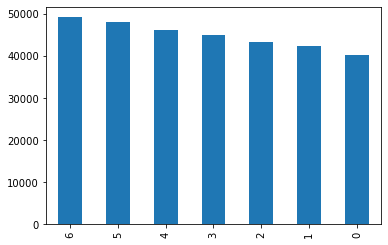

In [22]:
year.plot(kind='bar')